In [1]:
import pandas as pd
import numpy as np
import wrangle
import matplotlib.pyplot as plt

# modeling methods
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression, LassoLars, TweedieRegressor
from sklearn.preprocessing import PolynomialFeatures

from wrangle import wrangle_zillow
from wrangle import train_validate_test_split
from wrangle import scale_data

import warnings
warnings.filterwarnings("ignore")

In [2]:
df =  wrangle_zillow()

In [3]:
df.head()

,bedroomcnt,bathroomcnt,calculatedfinishedsquarefeet,taxvaluedollarcnt,yearbuilt,taxamount,fips
0,2,1.0,1412,222671,1947,2954.03,6037
1,3,2.0,1296,64968,1955,909.28,6037
2,3,1.0,1044,126800,1947,1767.69,6037
3,3,2.0,1336,213833,1955,2699.34,6037
4,3,2.0,1510,338022,1979,4166.31,6037


In [4]:
train, validate, test = train_validate_test_split(df)

In [5]:
train.head()

,bedroomcnt,bathroomcnt,calculatedfinishedsquarefeet,taxvaluedollarcnt,yearbuilt,taxamount,fips
41889,5,4.5,3206,893912,1991,9962.48,6059
5887,3,1.0,1255,140436,1949,2123.69,6037
38956,2,1.0,1049,623196,1941,7570.41,6037
915,2,3.0,1675,354714,1988,4225.74,6037
35420,5,4.0,3064,945376,1956,11206.16,6037


In [6]:
train_scaled, validate_scaled, test_scaled = scale_data(train, validate, test, )['bedroomcnt', 'bathroomcnt', 'taxvaluedollarcnt', 'taxamount', 'calculatedfinishedsquarefeet']

In [9]:
train_scaled.columns

Index(['bedroomcnt', 'bathroomcnt', 'calculatedfinishedsquarefeet',
       'taxvaluedollarcnt', 'yearbuilt', 'taxamount', 'fips',
       'bedroomcnt_scaled', 'bathroomcnt_scaled', 'taxvaluedollarcnt_scaled',
       'taxamount_scaled', 'calculatedfinishedsquarefeet_scaled'],
      dtype='object')

In [14]:
train_scaled.head()

,bedroomcnt,bathroomcnt,calculatedfinishedsquarefeet,taxvaluedollarcnt,yearbuilt,taxamount,fips,bedroomcnt_scaled,bathroomcnt_scaled,taxvaluedollarcnt_scaled,taxamount_scaled,calculatedfinishedsquarefeet_scaled
41889,5,4.5,3206,893912,1991,9962.48,6059,0.833333,0.750000,0.447116,0.339275,0.354399
5887,3,1.0,1255,140436,1949,2123.69,6037,0.500000,0.166667,0.069598,0.071779,0.134618
38956,2,1.0,1049,623196,1941,7570.41,6037,0.333333,0.166667,0.311478,0.257646,0.111412
915,2,3.0,1675,354714,1988,4225.74,6037,0.333333,0.500000,0.176959,0.143511,0.181931
35420,5,4.0,3064,945376,1956,11206.16,6037,0.833333,0.666667,0.472901,0.381715,0.338403


In [11]:
X_train_exp = train[['bedroomcnt', 'bathroomcnt', 'taxamount', 'calculatedfinishedsquarefeet', 'yearbuilt', 'fips']] # Unscaled
X_train = train_scaled[['bedroomcnt_scaled', 'bathroomcnt_scaled', 'taxamount_scaled', 'calculatedfinishedsquarefeet_scaled']] # scaled
y_train = train['taxvaluedollarcnt'] # Unscaled, target variable only

X_validate = validate_scaled[['bedroomcnt_scaled', 'bathroomcnt_scaled', 'taxamount_scaled', 'calculatedfinishedsquarefeet_scaled']]
y_validate= validate['taxvaluedollarcnt'] # Unscaled, target variable only

X_test= test_scaled[['bedroomcnt_scaled', 'bathroomcnt_scaled', 'taxamount_scaled', 'calculatedfinishedsquarefeet_scaled']]
y_test = test['taxvaluedollarcnt'] # Unscaled, target variable only

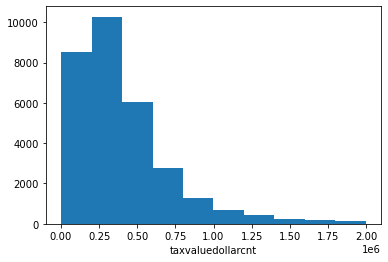

In [13]:
plt.hist(y_train)
plt.xlabel('taxvaluedollarcnt')
plt.ylabel('')
plt.show()